Eigentliche gute Vorhersage.
Jetzt mehr backcandles ausprobieren, hyperparamter anapassen. inputs wo 150 ist. möglichkeit weitere indikatoren oder wie auch immer.

PROBLEM: Warum das Modell einen Denkfehler hat: Das Modell lernt, dass der aktuelle closingprice nicht all zu weit vom nächsten closingpreis entfernt seien wird. Jeder vorhergesagte Wert der nah am Closingpreis des vorherigen Tages ist, sieht aus als sei er genau.
Es sieht gut aus aber man kann erkennen, dass vorhersage nur 1 Tag verzögerter tatsächlicher Wert ist.
Modell versucht Closing Preis des nächsten Tages vorherzusagen anhand vergangener Daten. Das wird für jeden Tag getestet und soll zukpünftige Werte vorherzusagen

Neuer Ansatz. Target ist der Unterschied zwischen Close der aktuellen Kerze zur nächsten Close Kerze. Es wird nun statt dem Closepreis des nächsten Tages vorherzusagen, versucht um wie viel der preis hoch oder runter geht. Wo ist der Unterschied? Nächster candle Price vs Preisbewegung.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
import seaborn as sns
import matplotlib.dates as mdates

ModuleNotFoundError: No module named 'pandas_ta'

In [ ]:
#.\venv\Scripts\activate

In [ ]:
data1 = pd.read_csv("C:\WWI2021\Semester 6\Machine Learning\data\BTC-USD.csv")
data1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3517,2024-05-04,62891.031250,64494.957031,62599.351563,63891.472656,63891.472656,20620477992
3518,2024-05-05,63892.453125,64610.890625,62955.304688,64031.132813,64031.132813,18296164805
3519,2024-05-06,64038.312500,65494.902344,62746.238281,63161.949219,63161.949219,28697928697
3520,2024-05-07,63162.761719,64390.457031,62285.980469,62334.816406,62334.816406,25930730982


In [ ]:
data1['RSI']=ta.rsi(data1.Close, length=15)
data1['EMA20']=ta.ema(data1.Close, length=20)
data1['EMA100']=ta.ema(data1.Close, length=100)
data1['EMA150']=ta.ema(data1.Close, length=150)

data1

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA20,EMA100,EMA150
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3517,2024-05-04,62891.031250,64494.957031,62599.351563,63891.472656,63891.472656,20620477992,49.568973,63492.451518,60023.934751,55814.205645
3518,2024-05-05,63892.453125,64610.890625,62955.304688,64031.132813,64031.132813,18296164805,49.895138,63543.754499,60103.285208,55923.039118
3519,2024-05-06,64038.312500,65494.902344,62746.238281,63161.949219,63161.949219,28697928697,47.832307,63507.392091,60163.852812,56018.918722
3520,2024-05-07,63162.761719,64390.457031,62285.980469,62334.816406,62334.816406,25930730982,45.897570,63395.718216,60206.842190,56102.572996


In [ ]:
data1['Target'] = data1['Adj Close']-data1.Open
data1['Target'] = data1['Target'].shift(-1)
data1

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA20,EMA100,EMA150,Target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN,NaN,-32.419983
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,NaN,NaN,-29.307007
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN,NaN,NaN,14.230988
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN,NaN,NaN,-9.263977
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,NaN,NaN,NaN,3.052002
...,...,...,...,...,...,...,...,...,...,...,...,...
3517,2024-05-04,62891.031250,64494.957031,62599.351563,63891.472656,63891.472656,20620477992,49.568973,63492.451518,60023.934751,55814.205645,138.679688
3518,2024-05-05,63892.453125,64610.890625,62955.304688,64031.132813,64031.132813,18296164805,49.895138,63543.754499,60103.285208,55923.039118,-876.363281
3519,2024-05-06,64038.312500,65494.902344,62746.238281,63161.949219,63161.949219,28697928697,47.832307,63507.392091,60163.852812,56018.918722,-827.945313
3520,2024-05-07,63162.761719,64390.457031,62285.980469,62334.816406,62334.816406,25930730982,45.897570,63395.718216,60206.842190,56102.572996,0.355469


In [ ]:

data1_clean = data1
data1_clean.dropna(inplace=True)
data1_clean.reset_index(drop=True, inplace=True)

data1_clean.drop([ 'Open', 'High', 'Low', 'Adj Close', 'Close', 'Date', 'Volume'], axis=1, inplace=True)
data1_clean

,RSI,EMA20,EMA100,EMA150,Target
0,50.019072,229.312807,288.640505,327.932773,21.793014
1,58.174526,231.980256,288.020317,326.997518,-22.681992
2,49.315763,232.251183,286.966944,325.776690,-0.981995
3,48.967016,232.402785,285.914985,324.559025,10.188004
4,52.543343,233.470139,285.077263,323.486853,-7.453995
...,...,...,...,...,...
3367,47.271348,63450.449293,59945.802672,55705.785954,1000.441406
3368,49.568973,63492.451518,60023.934751,55814.205645,138.679688
3369,49.895138,63543.754499,60103.285208,55923.039118,-876.363281
3370,47.832307,63507.392091,60163.852812,56018.918722,-827.945313


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
df1_scaled = sc.fit_transform(data1_clean)
print(df1_scaled)

[[4.73730553e-01 0.00000000e+00 7.79925300e-04 1.41124086e-03
  5.10015892e-01]
 [5.71810073e-01 3.89258577e-05 7.69582797e-04 1.39449606e-03
  5.07025701e-01]
 [4.65272382e-01 4.28794845e-05 7.52016329e-04 1.37263836e-03
  5.08484658e-01]
 ...
 [4.72240089e-01 9.23942559e-01 9.98273042e-01 9.96785627e-01
  4.49630087e-01]
 [4.47431974e-01 9.23411925e-01 9.99283092e-01 9.98502254e-01
  4.52885375e-01]
 [4.24164341e-01 9.21782277e-01 1.00000000e+00 1.00000000e+00
  5.08574580e-01]]


In [ ]:
# backcandles = windowing
backcandles = 10
num_features = 4  # Vier Features: RSI, EMA20, EMA100, EMA150
X = [[] for _ in range(num_features)]

# Generieren des windowed Feature-Sets  
for j in range(num_features):
    for i in range(backcandles, df1_scaled.shape[0]):
        X[j].append(df1_scaled[i-backcandles:i, j])

# Achse verschieben
X = np.moveaxis(X, 0, 2)

# Anpassen von y, um die Länge von X zu entsprechen
yi = df1_scaled[backcandles:, -1]  # Letzte Spalte ist TargetNextClose
y = np.reshape(yi, (len(yi), 1))

# Umwandeln von X in ein Numpy-Array
X = np.array(X)



In [ ]:
# Definition der Split-Grenzen
split_limit_1 = int(len(X) * 0.7)  # 70% der Daten für das Training
split_limit_2 = int(len(X) * 0.9)  # Weitere 20% für die Validierung, 10% für den Test

# Aufteilung in Trainings-, Validierungs- und Testdatensätze
X_train, X_val, X_test = X[:split_limit_1], X[split_limit_1:split_limit_2], X[split_limit_2:]
y_train, y_val, y_test = y[:split_limit_1], y[split_limit_1:split_limit_2], y[split_limit_2:]

# Ausgabe der Dimensionen der Datensätze
print("Train Data Shape:", X_train.shape, y_train.shape)
print("Validation Data Shape:", X_val.shape, y_val.shape)
print("Test Data Shape:", X_test.shape, y_test.shape)



Train Data Shape: (2353, 10, 4) (2353, 1)
Validation Data Shape: (672, 10, 4) (672, 1)
Test Data Shape: (337, 10, 4) (337, 1)
Sample Y Train Data: [[0.508533  ]
 [0.50845521]
 [0.50848943]
 [0.50972   ]
 [0.50860063]
 [0.50894863]
 [0.50958022]
 [0.50899818]
 [0.50795244]
 [0.5087819 ]]


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Activation
from tensorflow.keras import optimizers

# Eingabeschicht definieren
lstm_input = Input(shape=(backcandles, 4), name='lstm_input')  # 4 Features annehmen

# LSTM-Schicht hinzufügen
inputs = LSTM(150, name='first_layer')(lstm_input)

# Dense-Schicht für die Ausgabe
inputs = Dense(1, name='dense_layer')(inputs)

# Ausgabe-Schicht
output = Activation('linear', name='output')(inputs)

# Modell zusammenstellen
model = Model(inputs=lstm_input, outputs=output)

# Optimierer definieren
adam = optimizers.Adam()

# Modell kompilieren
model.compile(optimizer=adam, loss='mse')

# Modell trainieren, mit expliziten Trainings- und Validierungsdaten
model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=15, 
    epochs=30, 
    shuffle=True, 
    validation_data=(X_val, y_val)  # Nutzung der expliziten Validierungsdaten
)


Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0391 - val_loss: 0.0090
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_loss: 0.0082
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - val_loss: 0.0108
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - val_loss: 0.0062
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - val_loss: 0.0073
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - val_loss: 0.0062
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.0064
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.0062
Epoch 9/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - val_loss: 0.0065
Epoch 10/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - val_loss: 0.0063
Epoch 11/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 0.0062
Epoch 12/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [ ]:
# Vorhersagen mit dem Testdatensatz
y_pred = model.predict(X_test)

# Ausgabe der ersten 10 Vorhersageergebnisse und deren tatsächlichen Werten
for i in range(10):
    print(f"Predicted: {y_pred[i][0]:.4f}, Actual: {y_test[i]}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted: 0.5062, Actual: [0.44873662]
Predicted: 0.5066, Actual: [0.51934579]
Predicted: 0.5070, Actual: [0.50683295]
Predicted: 0.5068, Actual: [0.46615879]
Predicted: 0.5069, Actual: [0.51434192]
Predicted: 0.5065, Actual: [0.50641367]
Predicted: 0.5063, Actual: [0.5096121]
Predicted: 0.5063, Actual: [0.45506126]
Predicted: 0.5063, Actual: [0.53912295]
Predicted: 0.5059, Actual: [0.55912203]


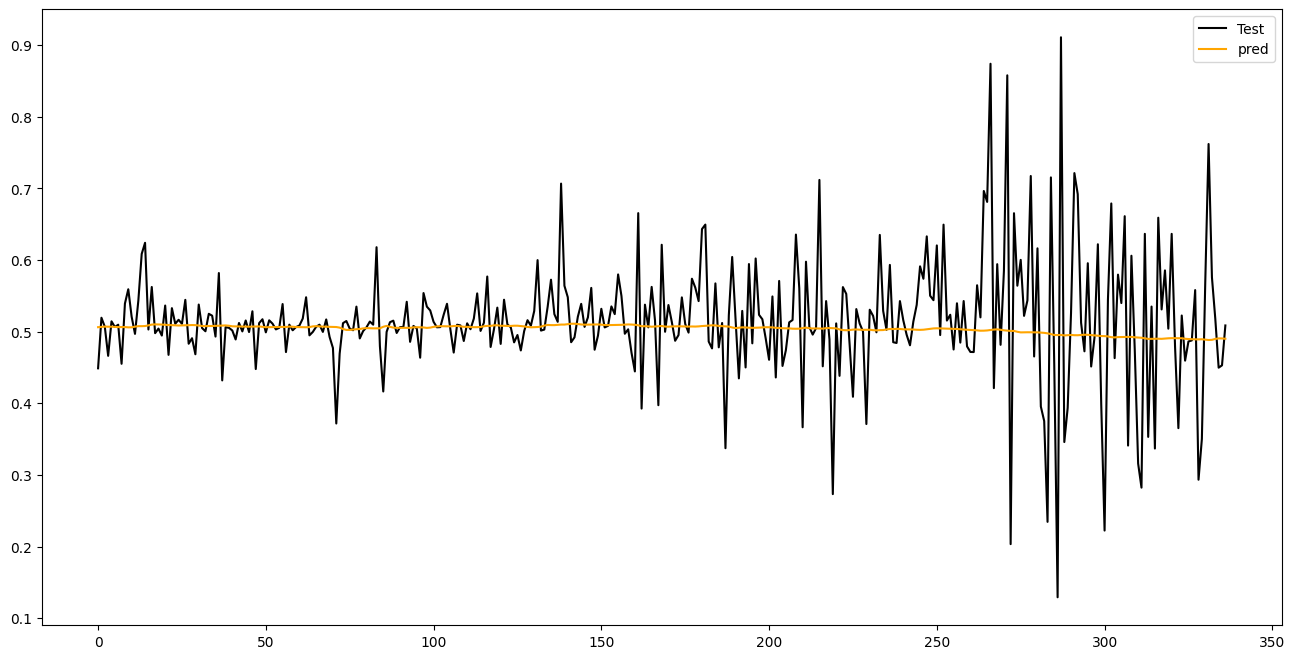

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'orange', label = 'pred')
plt.legend()
plt.show()

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


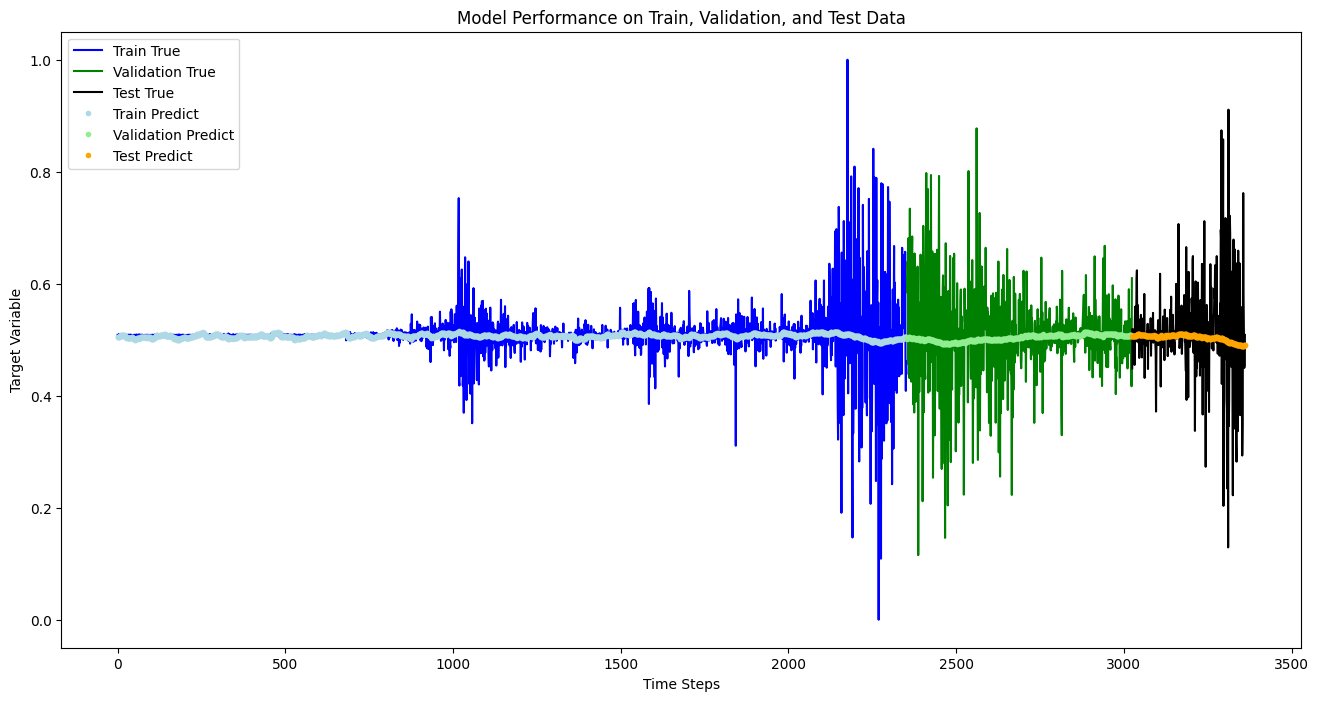

In [ ]:
# Vorhersagen für Trainings-, Validierungs- und Testdatensätze machen
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Umwandlung der Vorhersagen von 2D zu 1D, falls notwendig
y_train_pred = y_train_pred.ravel()
y_val_pred = y_val_pred.ravel()
y_test_pred = y_test_pred.ravel()

# Plot erstellen
plt.figure(figsize=(16, 8))

# Datensätze plotten
plt.plot(y_train, color='blue', label='Train True')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_val)), y_val, color='green', label='Validation True')
plt.plot(np.arange(len(y_train) + len(y_val), len(y_train) + len(y_val) + len(y_test)), y_test, color='black', label='Test True')

plt.plot(y_train_pred, 'o', color='lightblue', markersize=3, label='Train Predict')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_val)), y_val_pred, 'o', color='lightgreen', markersize=3, label='Validation Predict')
plt.plot(np.arange(len(y_train) + len(y_val), len(y_train) + len(y_val) + len(y_test)), y_test_pred, 'o', color='orange', markersize=3, label='Test Predict')

# Legende und Labels hinzufügen
plt.title('Model Performance on Train, Validation, and Test Data')
plt.xlabel('Time Steps')
plt.ylabel('Target Variable')
plt.legend()
plt.show()


Optimierungsmöglichkeiten für wenn Lifecycle Management Tool eingeführt ist:

Wenn Sie die Preisbewegung (zum Beispiel die Richtung der Preisänderung oder die prozentuale Änderung) anstelle des tatsächlichen Preises vorhersagen und feststellen, dass die Leistung des Modells nicht zufriedenstellend ist, gibt es mehrere Ansätze, um die Vorhersagequalität zu verbessern. Hier sind einige Strategien, die Sie in Betracht ziehen können:


### 2. **Modellarchitektur anpassen**
- **Anzahl der LSTM-Einheiten ändern**: Erhöhen oder verringern Sie die Anzahl der Neuronen in den LSTM-Schichten, um zu sehen, ob dies die Modellleistung beeinflusst.
- **Tiefe des Netzwerks**: Fügen Sie mehrere LSTM-Schichten hinzu, um ein tieferes Netzwerk zu erstellen, das möglicherweise komplexere Muster erfassen kann.
- **Dropout hinzufügen**: Um Overfitting zu vermeiden, fügen Sie Dropout-Schichten hinzu, die helfen können, die Generalisierbarkeit des Modells zu verbessern.

### 3. **Hyperparameter optimieren**
- **Lernrate anpassen**: Experimentieren Sie mit unterschiedlichen Lernraten und anderen Optimierungsparametern.
- **Batch-Größe und Epochenzahl**: Das Ändern der Batch-Größe und der Anzahl der Epochen kann erhebliche Auswirkungen auf das Trainingsergebnis haben.
- **Regularisierung anwenden**: Experimentieren Sie mit verschiedenen Arten von Regularisierungen (L1, L2), um das Overfitting zu kontrollieren.

### 4. **Verlustfunktion anpassen**
- **Andere Verlustfunktionen ausprobieren**: Wenn Sie die Richtung der Preisbewegung vorhersagen, könnte eine binäre Kreuzentropie (wenn es sich um eine Klassifikationsaufgabe handelt) oder eine benutzerdefinierte Verlustfunktion, die speziell für Ihr Vorhersageziel entwickelt wurde, nützlich sein.

### 5. **Trainingstechniken überprüfen**
- **Frühzeitiges Beenden**: Verwenden Sie Early Stopping, um das Training zu beenden, wenn sich die Validierungsleistung nicht mehr verbessert.
- **Daten-Shuffling und -Partitionierung**: Stellen Sie sicher, dass Ihre Trainings-, Validierungs- und Testdatensätze richtig partitioniert und während des Trainings effektiv gemischt werden.

### 6. **Evaluation und Benchmarking**
- **Cross-Validation verwenden**: Statt einer einfachen Train-Test-Split kann Cross-Validation eine robustere Evaluation der Modellleistung bieten.
- **Leistungsmetriken**: Überprüfen Sie, ob Sie die richtigen Metriken für die Bewertung des Modells verwenden. Für Klassifikationsaufgaben sind Genauigkeit, F1-Score, ROC-AUC usw. relevant.

Diese Ansätze bieten verschiedene Wege, die Modellleistung zu verbessern und sollten je nach spezifischem Szenario und den Ergebnissen der initialen Modellbewertungen angepasst werden.